In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Data Analyst\vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# Filling the missing values in Year column with median year
median = df['Year'].median()
df['Year'].fillna(median, inplace = True)

In [12]:
# Dropping rows with missing Publisher name
df.dropna(subset='Publisher', inplace=True)

In [14]:
# Getting rid of decimal part in Year column
df['Year'] = df['Year'].astype('Int64')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


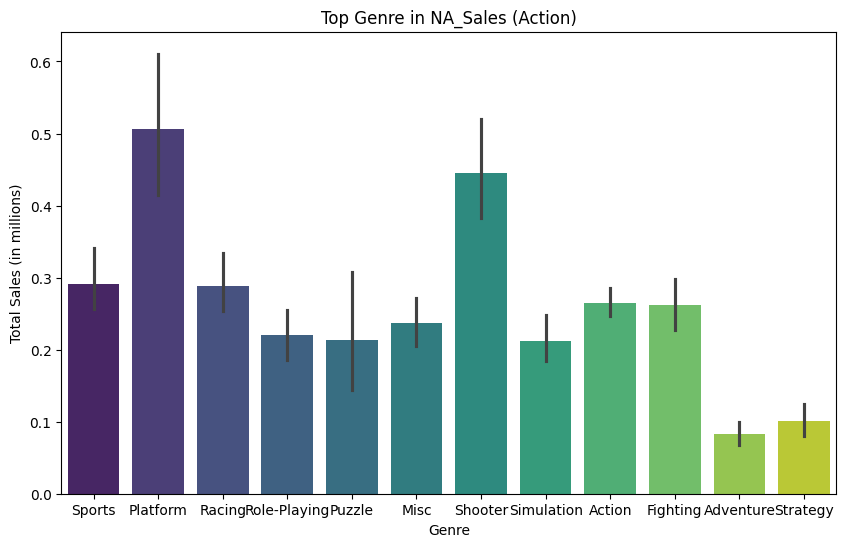

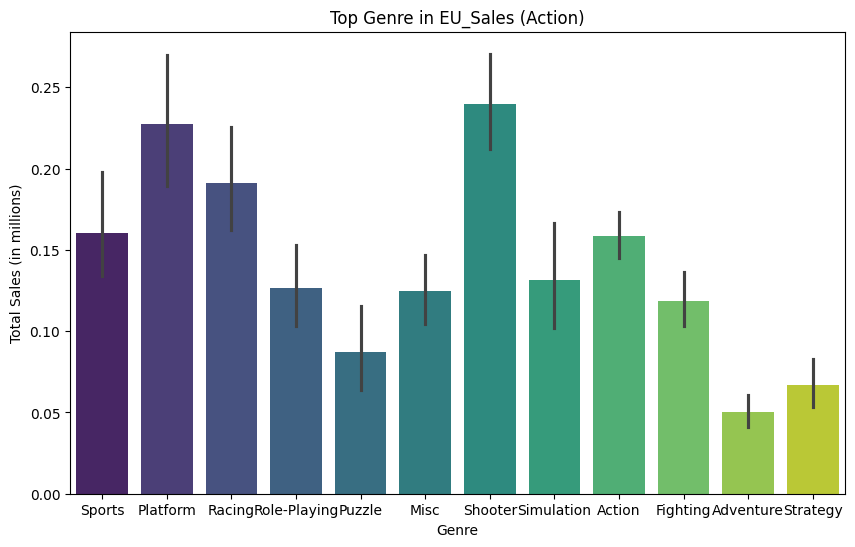

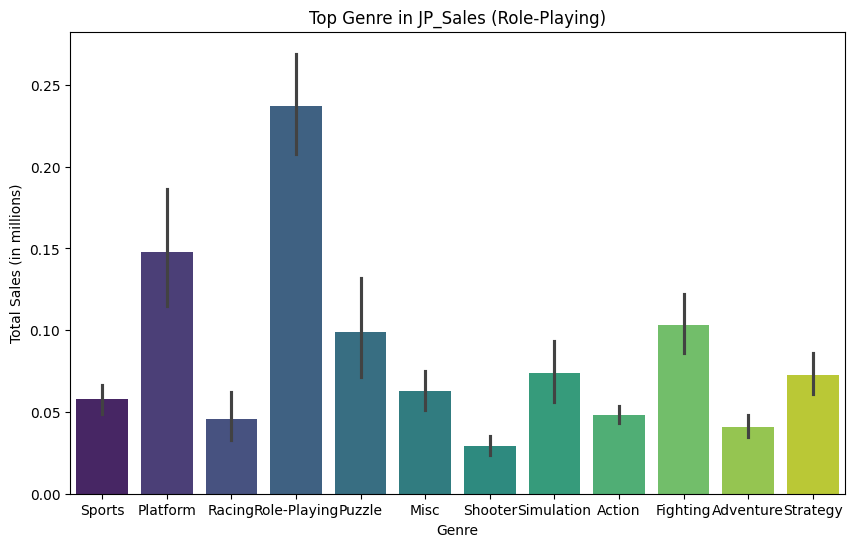

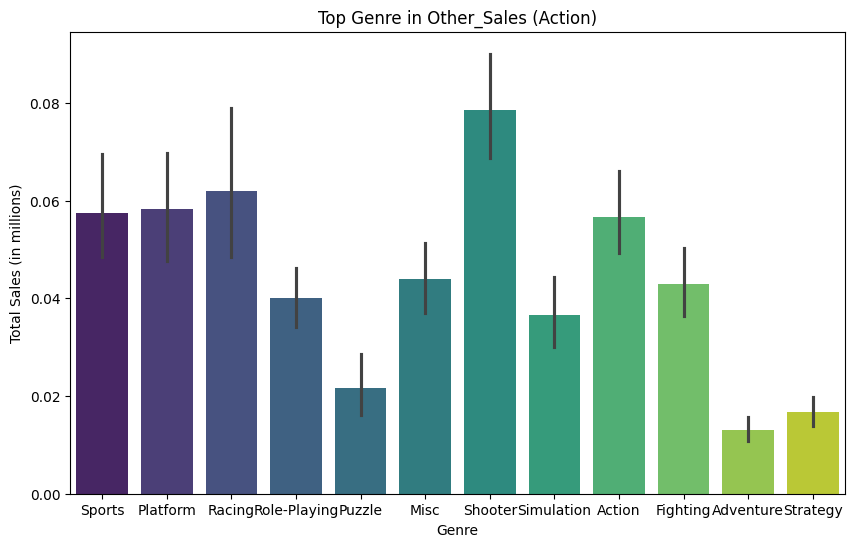

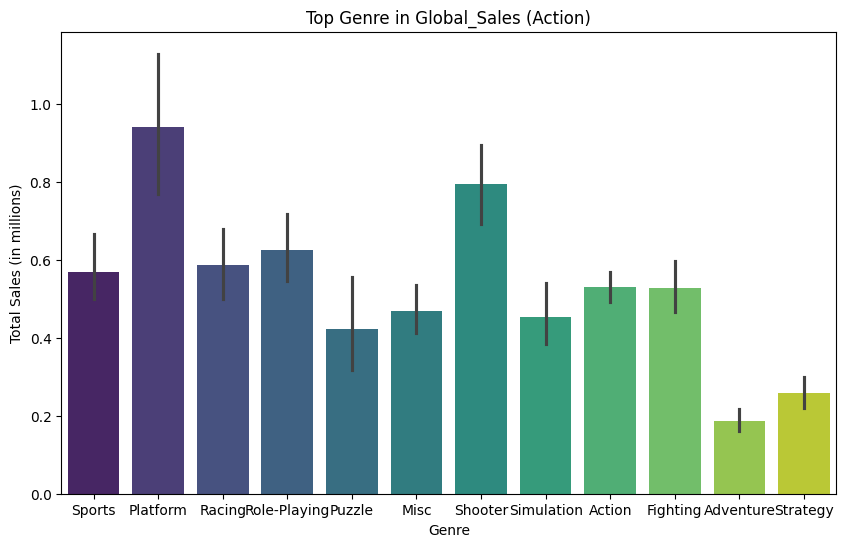

In [26]:
# Seeing Top Sales by Genre and Region
region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
top_genres_by_region = {}

for region in region_columns:
    total_sales_by_genre = df.groupby('Genre')[region].sum()
    top_genre = total_sales_by_genre.idxmax()
    top_genres_by_region[region] = top_genre

for region, top_genre in top_genres_by_region.items():
    plt.figure(figsize = (10,6))
    sns.barplot(x='Genre', y=region, hue='Genre', data=df, palette='viridis', legend=False)
    plt.title(f'Top Genre in {region} ({top_genre})')
    plt.xlabel('Genre')
    plt.ylabel(f'Total Sales (in millions)')
    plt.show

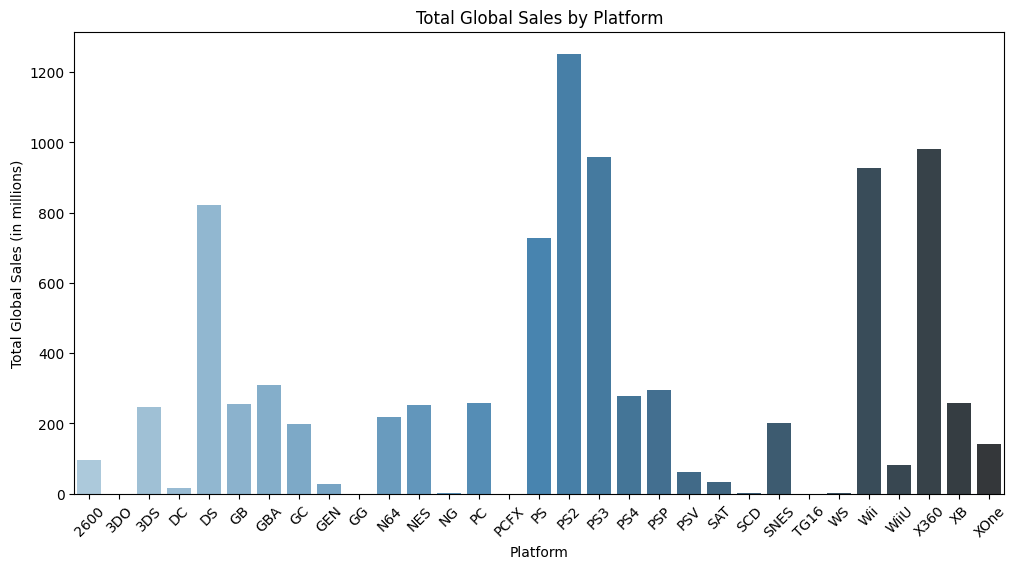

In [42]:
# Global Sales by Platform
total_sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_platform.index, y=total_sales_by_platform.values, hue=total_sales_by_platform.index, palette='Blues_d', legend=False)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

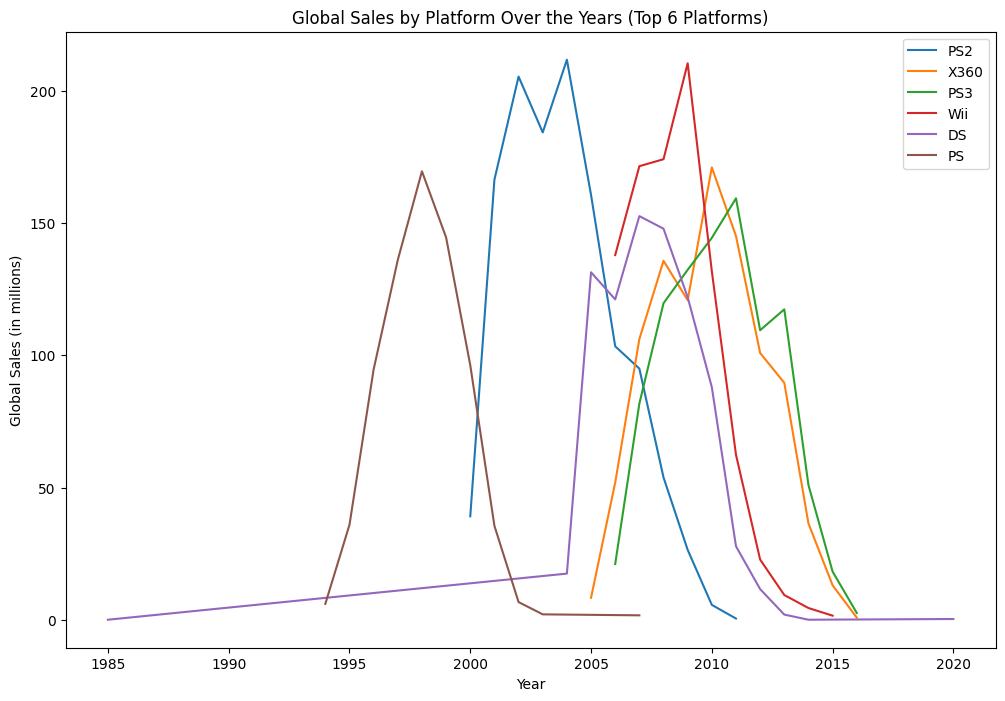

In [86]:
# Top 6 Platform Sales by Years
top_6_platforms = total_sales_by_platform.nlargest(6).index
sales_by_top_platforms = sales_by_platform_year[sales_by_platform_year['Platform'].isin(top_6_platforms)].reset_index()

plt.figure(figsize=(12, 8))
for platform in top_6_platforms:
    platform_data = sales_by_top_platforms[sales_by_top_platforms['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Global_Sales'], label=platform)

plt.title('Global Sales by Platform Over the Years (Top 6 Platforms)')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.show()

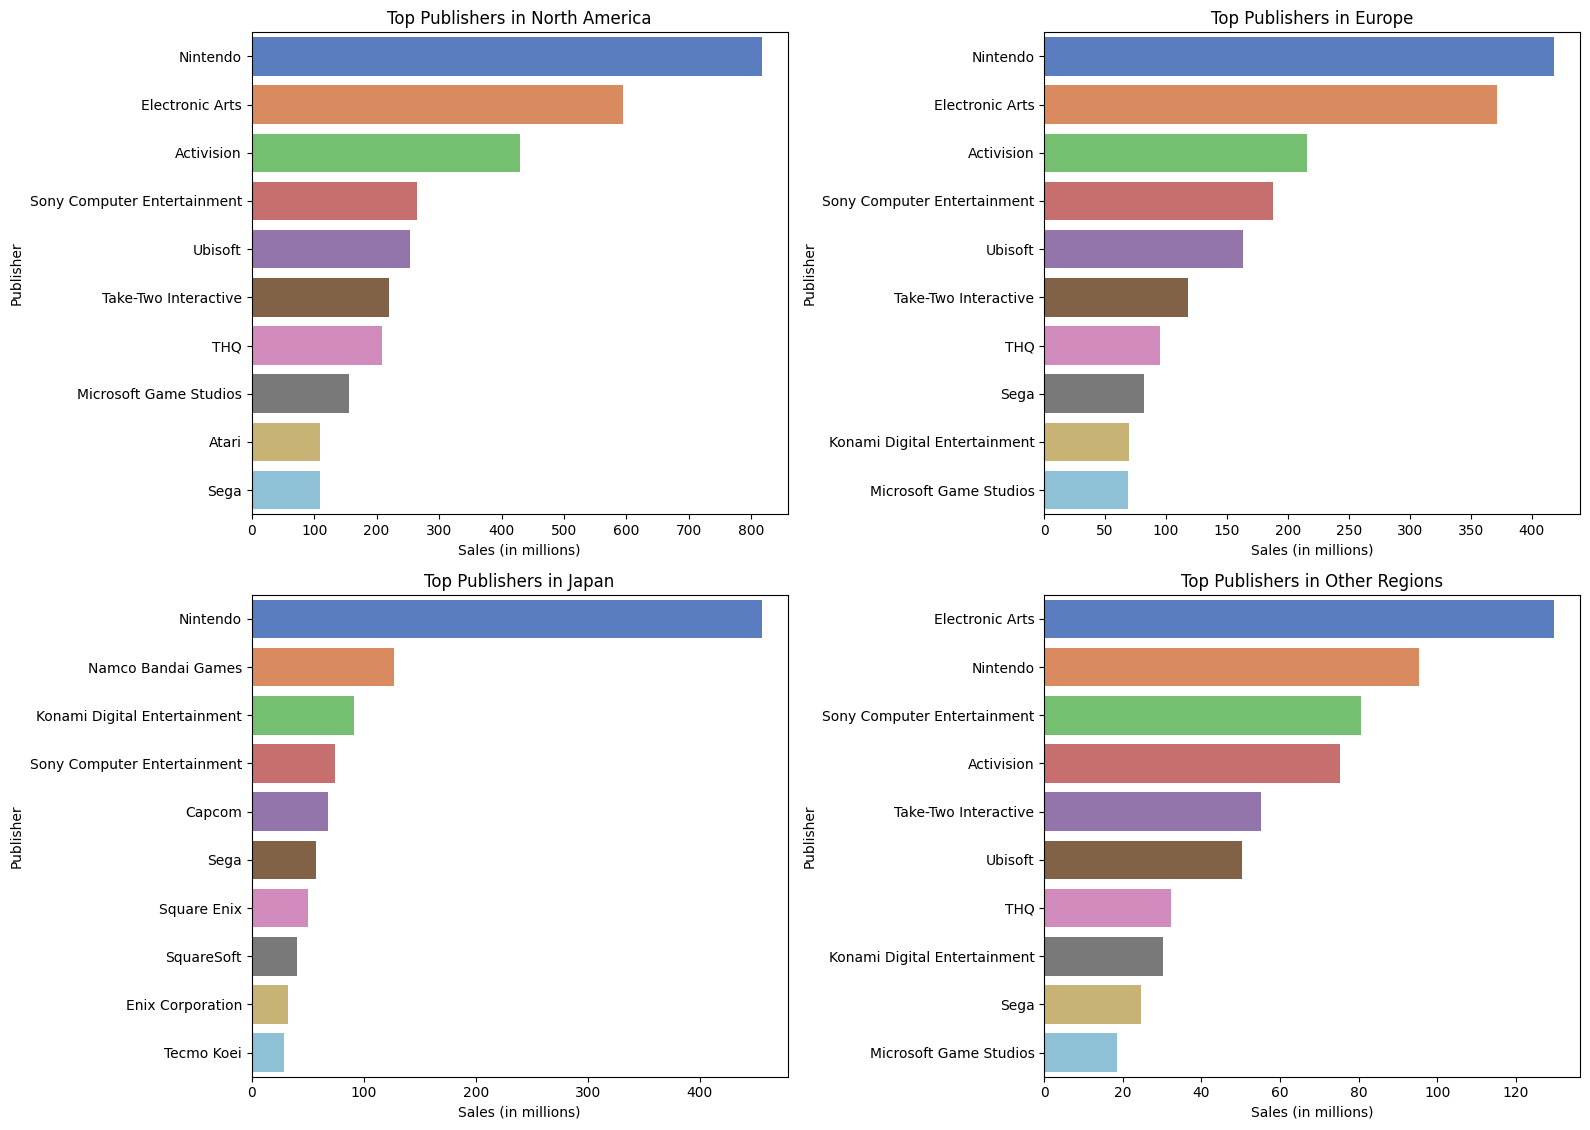

In [78]:
#Publisher Sales by Region

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# North America
sns.barplot(x=top_publishers_na.values, y=top_publishers_na.index, hue = top_publishers_na.index, palette='muted', ax=axes[0, 0], legend = False)
axes[0, 0].set_title('Top Publishers in North America')
axes[0, 0].set_xlabel('Sales (in millions)')
axes[0, 0].set_ylabel('Publisher')

# Europe
sns.barplot(x=top_publishers_eu.values, y=top_publishers_eu.index, hue = top_publishers_eu.index, palette='muted', ax=axes[0, 1], legend = False)
axes[0, 1].set_title('Top Publishers in Europe')
axes[0, 1].set_xlabel('Sales (in millions)')
axes[0, 1].set_ylabel('Publisher')

# Japan
sns.barplot(x=top_publishers_jp.values, y=top_publishers_jp.index, hue = top_publishers_jp.index, palette='muted', ax=axes[1, 0], legend = False)
axes[1, 0].set_title('Top Publishers in Japan')
axes[1, 0].set_xlabel('Sales (in millions)')
axes[1, 0].set_ylabel('Publisher')

# Other Regions
sns.barplot(x=top_publishers_other.values, y=top_publishers_other.index, hue = top_publishers_other.index, palette='muted', ax=axes[1, 1], legend = False)
axes[1, 1].set_title('Top Publishers in Other Regions')
axes[1, 1].set_xlabel('Sales (in millions)')
axes[1, 1].set_ylabel('Publisher')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()